In [1]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

import seaborn as sns

import statsmodels.api as sm

# Ontario's Social Distancing Score

In [28]:
# import data
mobility_ontario = pd.read_csv('../../data/cleaned_data/modeling_data.csv')

# drop column
mobility_ontario = mobility_ontario.drop('Unnamed: 0', axis=1)

# define features and target
features = ['Confirmed Cases (Ontario)', 'New Cases (Ontario)', 'New Cases (World)', 'Cumulative Cases (World)', \
            'New Deaths (World)', 'Cumulative Deaths (World)', 'Mean Temperature', 'Total Precipitation', \
            'Days Since First Case']
target = 'Score'

In [29]:
mobility_ontario.columns

Index(['Date', 'Score', 'Confirmed Cases (Ontario)', 'New Cases (Ontario)',
       'New Cases (World)', 'Cumulative Cases (World)', 'New Deaths (World)',
       'Cumulative Deaths (World)', 'Mean Temperature', 'Total Precipitation',
       'Days Since First Case', 'Letter Score'],
      dtype='object')

## Multiple Linear Regression

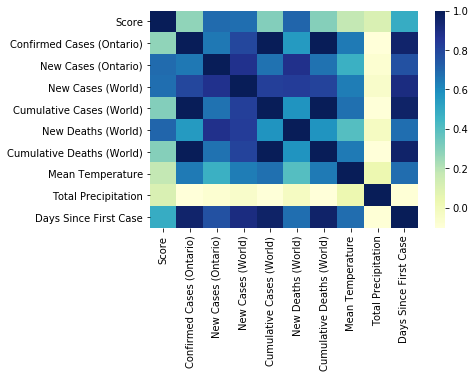

In [30]:
# Multicollinearity assumption

# Drop column
corr_data = mobility_ontario.drop('Date', axis=1)

# Correlation matrix
corr = corr_data.corr()

# heatmap to visualize correlation
sns.heatmap(corr, cmap="YlGnBu")

### MLR with all features

In [31]:
X_mlr = mobility_ontario[features]
y_mlr = mobility_ontario[target]

mlr = sm.OLS(y_mlr, X_mlr).fit()
predictions = mlr.predict(X_mlr)

mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Score   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                              265.7
Date:                Mon, 08 Jun 2020   Prob (F-statistic):                    2.92e-56
Time:                        12:14:19   Log-Likelihood:                         -334.98
No. Observations:                  90   AIC:                                      688.0
Df Residuals:                      81   BIC:                                      710.5
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Confirmed Cases (Ontario)    -0.0168      0.008     -2.235      0.028      -0.032      -0.002
New Cases (Ontario)           0.0145      0.014      1.030      0.306      -0.014       0.043
New Cases (World)             0.0005      0.000      4.225      0.000       0.000       0.001
Cumulative Cases (World)  -1.852e-05   1.36e-05     -1.360      0.178   -4.56e-05    8.58e-06
New Deaths (World)           -0.0007      0.001     -0.680      0.498      -0.003       0.001
Cumulative Deaths (World)     0.0014      0.001      2.416      0.018       0.000       0.003
Mean Temperature             -0.8060      0.327     -2.461      0.016      -1.458      -0.154
Total Precipitation           0.8290      0.377      2.196      0.031       0.078       1.580
Days Since First Case         0.4748      0.087      5.442      0.000       0.301       0.648
==============================================================================
Omnibus:                        0.704   Durbin-Watson:                   1.682
Prob(Omnibus):                  0.703   Jarque-Bera (JB):                0.369
Skew:                           0.143   Prob(JB):                        0.831
Kurtosis:                       3.131   Cond. No.                     8.91e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.91e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### MLR with selected features

In [32]:
features = ['Confirmed Cases (Ontario)', 'New Cases (Ontario)', 'New Cases (World)', 'Cumulative Cases (World)', \
            'Mean Temperature', 'Total Precipitation', \
            'Days Since First Case']

X_mlr = mobility_ontario[features]
y_mlr = mobility_ontario[target]

mlr = sm.OLS(y_mlr, X_mlr).fit()
predictions = mlr.predict(X_mlr)

mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Score   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.962
Method:                 Least Squares   F-statistic:                              325.5
Date:                Mon, 08 Jun 2020   Prob (F-statistic):                    1.54e-57
Time:                        12:14:21   Log-Likelihood:                         -338.14
No. Observations:                  90   AIC:                                      690.3
Df Residuals:                      83   BIC:                                      707.8
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Confirmed Cases (Ontario)     0.0006      0.002      0.249      0.804      -0.004       0.005
New Cases (Ontario)           0.0165      0.013      1.312      0.193      -0.008       0.041
New Cases (World)             0.0006      0.000      5.249      0.000       0.000       0.001
Cumulative Cases (World)  -1.774e-05   1.36e-05     -1.300      0.197   -4.49e-05     9.4e-06
Mean Temperature             -1.0806      0.314     -3.436      0.001      -1.706      -0.455
Total Precipitation           0.9292      0.383      2.424      0.018       0.167       1.692
Days Since First Case         0.6119      0.068      8.991      0.000       0.477       0.747
==============================================================================
Omnibus:                        0.331   Durbin-Watson:                   1.652
Prob(Omnibus):                  0.848   Jarque-Bera (JB):                0.167
Skew:                           0.105   Prob(JB):                        0.920
Kurtosis:                       3.020   Cond. No.                     8.72e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.72e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Conclusion

Multiple linear regression might not be a good model to model relationship between Ontario's social distancing score and the features we have. It violates the "no multicollinearity" assumption between the independent variables. As shown in the heatmap for the variables above, certain independent variables are highly correlated with each other.

## Random forests classification for Ontario's Social Distancing Score

In [33]:
# import data
mobility_ontario = pd.read_csv('../../data/cleaned_data/modeling_data.csv')

# drop column
mobility_ontario = mobility_ontario.drop('Unnamed: 0', axis=1)

# define features and target
features = ['Confirmed Cases (Ontario)', 'New Cases (Ontario)', 'New Cases (World)', 'Cumulative Cases (World)', \
            'New Deaths (World)', 'Cumulative Deaths (World)', 'Mean Temperature', 'Total Precipitation', \
            'Days Since First Case']
target = 'Letter Score'

In [34]:
# Define features and target
X = mobility_ontario[features]
y = mobility_ontario[target]

# Create training and testing data
X_train = mobility_ontario[features][:44]
y_train = mobility_ontario[target][:44]
X_test = mobility_ontario[features][44:]
y_test = mobility_ontario[target][44:]

In [35]:
# Create Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_predict = rfc.predict(X_test)
rfc

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
# Model evaluation
# rfc_cv_score = cross_val_score(rfc, X, y, cv=5, scoring='roc_auc')

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
# print("=== All AUC Scores ===")
# print(rfc_cv_score)
# print('\n')
# print("=== Mean AUC Score ===")
# print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[12 15  0]
 [ 4  9  0]
 [ 0  6  0]]


=== Classification Report ===
              precision    recall  f1-score   support

           A       0.75      0.44      0.56        27
           B       0.30      0.69      0.42        13
           C       0.00      0.00      0.00         6

    accuracy                           0.46        46
   macro avg       0.35      0.38      0.33        46
weighted avg       0.53      0.46      0.45        46





/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Random Forest classification for predicting social distancing score (Data by province)

In [44]:
# Import data
modeling_data = pd.read_csv('../../data/cleaned_data/modeling_data_province.csv')

# Drop column
modeling_data = modeling_data.drop('Unnamed: 0', axis=1)

# # define features and target
features = ['Confirmed', 'Probable', 'Death', 'New Cases', 'New Probable', 'New Deaths', 'Mean Temperature', \
            'Total Precipitation', 'New Cases (world)', 'Confirmed (world)', 'New Deaths (world)', 'Deaths (world)', \
            'Days Since First Case']
target = 'Letter Score'

In [45]:
modeling_data

,Province,Date,Score,pruid,Confirmed,Probable,Death,New Cases,New Probable,New Deaths,Mean Temperature,Total Precipitation,New Cases (world),Confirmed (world),New Deaths (world),Deaths (world),Days Since First Case,Letter Score
0,British Columbia,2020-02-16,1,59,5,0,0.0,1,0,0.0,5.0,4.8,2090,69277,142,1669,20,D
1,Ontario,2020-02-16,4,35,3,0,0.0,0,0,0.0,1.4,0.4,2090,69277,142,1669,20,D
2,Ontario,2020-02-21,21,35,3,0,0.0,0,0,0.0,-4.1,0.2,1044,76817,120,2249,25,C
3,British Columbia,2020-02-21,5,59,6,0,0.0,1,0,0.0,4.8,18.4,1044,76817,120,2249,25,D
4,British Columbia,2020-02-24,13,59,6,0,0.0,0,0,0.0,3.0,5.4,619,79565,164,2627,28,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,Nova Scotia,2020-05-25,47,12,1051,0,58.0,1,0,0.0,11.4,0.0,102660,5333415,3527,343115,119,B
691,Ontario,2020-05-25,39,35,25904,0,2102.0,404,0,29.0,24.1,1.4,102660,5333415,3527,343115,119,C
692,Quebec,2020-05-25,36,24,47984,0,4069.0,573,0,85.0,17.8,0.0,102660,5333415,3527,343115,119,C
693,Saskatchewan,2020-05-25,15,47,634,0,7.0,2,0,0.0,11.6,0.0,102660,5333415,3527,343115,119,D


In [46]:
# Define features and target
X = modeling_data[features]
y = modeling_data[target]

# Create training and testing data
X_train = modeling_data[features][:350]
y_train = modeling_data[target][:350]
X_test = modeling_data[features][350:]
y_test = modeling_data[target][350:]

# from sklearn.model_selection import train_test_split
# # implementing train-test-split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=66)

In [47]:
# Create Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_predict = rfc.predict(X_test)
rfc

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [48]:
# Tuning hyperparameters
from sklearn.model_selection import RandomizedSearchCV
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# number of features at every split
max_features = ['auto', 'sqrt']

# max depth
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)
# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }
# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the model
rfc_random.fit(X_train, y_train)
# print results
print(rfc_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   40.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.3min finished


{'n_estimators': 1000, 'max_features': 'auto', 'max_depth': 140}


In [41]:
# Model evaluation
# rfc_cv_score = cross_val_score(rfc, X, y, cv=5, scoring='roc_auc')

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))

=== Confusion Matrix ===
[[128   5   0   0]
 [119  18   0   0]
 [ 58  10   0   0]
 [  7   0   0   0]]


=== Classification Report ===
              precision    recall  f1-score   support

           A       0.41      0.96      0.58       133
           B       0.55      0.13      0.21       137
           C       0.00      0.00      0.00        68
           D       0.00      0.00      0.00         7

    accuracy                           0.42       345
   macro avg       0.24      0.27      0.20       345
weighted avg       0.37      0.42      0.31       345



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rfc, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

ModuleNotFoundError: No module named 'eli5'

# Random Forests Regression for predicting number of new cases in Canada

In [25]:
# Import data
modeling_data = pd.read_csv('../../data/cleaned_data/modeling_data_province.csv')

# Drop column
modeling_data = modeling_data.drop('Unnamed: 0', axis=1)

# # define features and target
features = ['Confirmed', 'Probable', 'Death', 'New Cases', 'New Probable', 'New Deaths', 'Mean Temperature', \
            'Total Precipitation', 'New Cases (world)', 'Confirmed (world)', 'New Deaths (world)', 'Deaths (world)', \
            'Days Since First Case']
target = 'Score'

In [26]:
# Define features and target
X = modeling_data[features]
y = modeling_data[target]


# Create training and testing data
X_train = modeling_data[features][:350]
y_train = modeling_data[target][:350]
X_test = modeling_data[features][350:]
y_test = modeling_data[target][350:]

y_train = pd.to_numeric(y_train, errors='coerce')
y_test = pd.to_numeric(y_test, errors='coerce')

# from sklearn.model_selection import train_test_split
# # implementing train-test-split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=66)

In [27]:
y_train.dtype

dtype('int64')

In [28]:
# Create Random Forest Classifier
rfc = RandomForestRegressor()
rfc.fit(X_train, y_train)
rfc_predict = rfc.predict(X_test)
rfc

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [35]:
y_test = y_test.astype(float)

In [36]:
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

ValueError: multiclass format is not supported

# MLR 

In [8]:
# Import data
modeling_data = pd.read_csv('../../data/cleaned_data/modeling_data_province.csv')

# Drop column
modeling_data = modeling_data.drop('Unnamed: 0', axis=1)

# # define features and target
# features = ['Confirmed', 'Probable', 'Death', 'New Cases', 'New Probable', 'New Deaths', 'Mean Temperature', \
#             'Total Precipitation', 'New Cases (world)', 'Confirmed (world)', 'New Deaths (world)', 'Deaths (world)', \
#             'Days Since First Case']
features = ['New Cases', 'New Probable', 'New Deaths', 'Mean Temperature', \
            'Total Precipitation', 'New Cases (world)', 'New Deaths (world)',\
            'Days Since First Case']
target = 'Score'

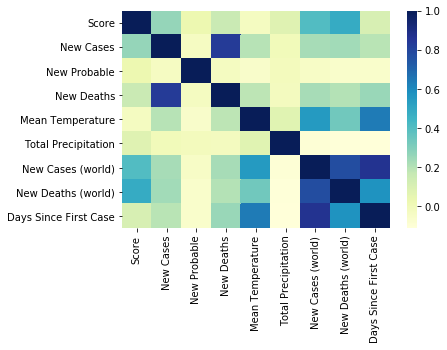

In [9]:
# Multicollinearity assumption

# Drop column
corr_data = modeling_data.drop(['Date', 'pruid', 'Confirmed', 'Probable', 'Death', 'Confirmed (world)', 'Deaths (world)'], axis=1)

# Correlation matrix
corr = corr_data.corr()

# heatmap to visualize correlation
sns.heatmap(corr, cmap="YlGnBu")

In [7]:
X_mlr = modeling_data[features]
y_mlr = modeling_data[target]

mlr = sm.OLS(y_mlr, X_mlr).fit()
predictions = mlr.predict(X_mlr)

mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Score   R-squared (uncentered):                   0.885
Model:                            OLS   Adj. R-squared (uncentered):              0.883
Method:                 Least Squares   F-statistic:                              659.7
Date:                Mon, 08 Jun 2020   Prob (F-statistic):                   1.86e-316
Time:                        14:37:24   Log-Likelihood:                         -3057.4
No. Observations:                 695   AIC:                                      6131.
Df Residuals:                     687   BIC:                                      6167.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
New Cases                 0.0413      0.006      7.400      0.000       0.030       0.052
New Probable              0.0769      0.035      2.171      0.030       0.007       0.146
New Deaths               -0.2881      0.057     -5.056      0.000      -0.400      -0.176
Mean Temperature         -1.7637      0.126    -13.966      0.000      -2.012      -1.516
Total Precipitation       1.0909      0.135      8.057      0.000       0.825       1.357
New Cases (world)         0.0003   6.35e-05      5.408      0.000       0.000       0.000
New Deaths (world)        0.0031      0.000      6.163      0.000       0.002       0.004
Days Since First Case     0.2168      0.042      5.213      0.000       0.135       0.299
==============================================================================
Omnibus:                        2.986   Durbin-Watson:                   0.924
Prob(Omnibus):                  0.225   Jarque-Bera (JB):                2.987
Skew:                          -0.090   Prob(JB):                        0.225
Kurtosis:                       3.266   Cond. No.                     1.31e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""